In [492]:
from bs4 import BeautifulSoup as bs
import requests
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# import time
# from datetime import datetime, timedelta

In [493]:
input_name = input("Enter Youtuber's Name: ")

list_name = input_name.split()

converted_name = input_name

if len(list_name) > 1:
    
    converted_name = ""
    
    for i in range(len(list_name)):

        converted_name = converted_name + list_name[i]
        
        if i != len(list_name)-1:
            converted_name = converted_name + "+"

search_name = converted_name + "+youtube"

start_url = "https://www.google.com/search?ei=1HwNXK-1IOuD5wL58IvQAQ&q=" + search_name\
            + "&oq=" + search_name + "&gs_l=psy-ab.3..0i10l10.11875.12940..13090...0.0..\
            0.111.636.7j1....3..0....1..gws-wiz.......0j0i71j35i39j0i131i67j0i131.JTu18mRUEho"

Enter Youtuber's Name: 2chainz


In [494]:
get_youtube_url_response = requests.get(start_url)

In [495]:
youtube_name_soup = bs(get_youtube_url_response.text, "lxml")

In [496]:
raw_youtube_name_link = youtube_name_soup.find_all("h3", class_="r")[0].a.get("href").replace("/url?q=","")

for character in raw_youtube_name_link:
    
    if character == "&":
    
        processed_youtube_name_link = raw_youtube_name_link.split("&", 1)[0]
    
final_youtube_name_link = processed_youtube_name_link + "/videos"

In [497]:
# Youtuber's Videos URL
url = final_youtube_name_link

In [498]:
# Get Response
response = requests.get(url)

In [499]:
# Create Soup Object
soup = bs(response.text, 'lxml')

In [500]:
# Extract Data
meta = soup.find_all('ul', class_='yt-lockup-meta-info')
titles = soup.find_all('h3', class_='yt-lockup-title')
durations = soup.find_all('span', class_ = "video-time")
links = soup.find_all('h3', class_='yt-lockup-title')

In [501]:
# Get all URLs in a list
urls = []

for link in links: 

    url = link.a.get("href")
    
    urls.append("https://www.youtube.com" + url)

In [502]:
# Get all Durations in a list
duration_videos = []

for duration in durations:
    
    duration_time = duration.text
    
    duration_videos.append(duration_time)

In [503]:
# Get all Titles in a list
title_videos = []

for title in titles:
    
    title_text = title.find('a').text
    
    title_videos.append(title_text)   

In [504]:
# Get all Views and Dates in two lists
views = []
date = []

for data in meta:
    
    meta_data = data.find_all("li")

    string_views = meta_data[0].text.split(" ")[0]
    
    int_views = int(string_views.replace(",",""))
    
    views.append(int_views)
    
#     raw_date = meta_data[1].text
     
#     date_list = raw_date.split(" ")
    
#     if date_list[1] == "hours":
        
#         hours = int(date_list[0])
#         days = hours/24
    
#     elif date_list[1] == "days":
        
#         days = int(date_list[0])
        
#     elif date_list[1] == "weeks":
        
#         weeks = int(date_list[0])
#         days = weeks*7
      
#     elif date_list[1] == "months":
        
#         months = int(date_list[0])
        
#         days = months*30
    
#     convert_date = (datetime.today() - timedelta(days=days)).date()
    
#     date.append(convert_date)

In [505]:
# Going to Each Videos and Extracting Data
published_on = []

for i in range(len(urls)):
    
    video_url = urls[i]
    
    video_response = requests.get(video_url)
    
    video_soup = bs(video_response.text, 'lxml')
    
    raw_publish_date = video_soup.find("strong",class_="watch-time-text").text
    
    if raw_publish_date.split(" ")[0] == "Published":
        
        publish_date = raw_publish_date.split(" ")[2:5]

        publish_date_format = " ".join(publish_date)

        published_on.append(publish_date_format)
    
    elif raw_publish_date.split(" ")[0] == "Premiered":
        
        publish_date = raw_publish_date.split(" ")[1:4]

        publish_date_format = " ".join(publish_date)

        published_on.append(publish_date_format)
    

In [506]:
# Create DataFrame
df = pd.DataFrame({"Published On": published_on,
                   "Title" : title_videos,
                   "Duration" : duration_videos,
                   "Views" : views,
                   "URL" : urls
                  })

df = df.sort_values("Published On",ascending=True).reindex()
df

,Published On,Title,Duration,Views,URL
5,"Apr 20, 2017","2 Chainz - It's A Vibe ft. Ty Dolla $ign, Trey...",3:20,73553024,https://www.youtube.com/watch?v=tU3p6mz-uxU
9,"Aug 12, 2012",2 Chainz - I Luv Dem Strippers (Explicit) ft. ...,4:06,38946444,https://www.youtube.com/watch?v=atHekn9KE18
38,"Aug 2, 2012",Bullet Brak ft. Triple Seis - Get Ya Paper Rig...,3:28,4503,https://www.youtube.com/watch?v=XVhCP4YDr90
22,"Aug 23, 2010",Nicki Minaj Interviews Tity Boi & Snoop Dogg (...,5:16,109510,https://www.youtube.com/watch?v=TrMkXF4jv04
4,"Aug 30, 2012",2 Chainz - Birthday Song (Official Music Video...,5:09,76684161,https://www.youtube.com/watch?v=Y34jC4I1m70
18,"Aug 4, 2016",2 Chainz - Intro (Audio),0:39,171019,https://www.youtube.com/watch?v=fRU65FwG0h8
39,"Aug 9, 2012",Mi$tro ft. Black Cobain - Real (Official Video...,5:07,113298,https://www.youtube.com/watch?v=d35hsx9nGUc
41,"Dec 19, 2012",Mi$tro - One Day At A Time Vlog (Atlanta Pt. 1...,7:45,443,https://www.youtube.com/watch?v=93lUe_xJTjs
43,"Dec 20, 2012",Mi$tro - Man Down ft. Daquon Da Don (Official ...,4:48,782,https://www.youtube.com/watch?v=Ta7zZpVwvYE
42,"Dec 20, 2012",Frost - America (Official Video) Shot by @JoeM...,4:32,576,https://www.youtube.com/watch?v=2hZW0tAUmMg


In [491]:
(df.Views.sum()/1000000)*2000

3311.44

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

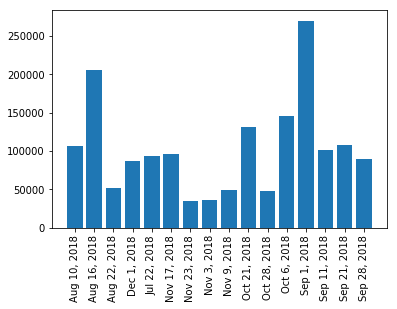

In [487]:
# Graph Data
plt.bar(np.arange(0,len(df),1),df["Views"], tick_label = df["Published On"])
plt.xticks(rotation=90)

In [471]:
url

'/user/WatchMojo'